In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#2023-set1

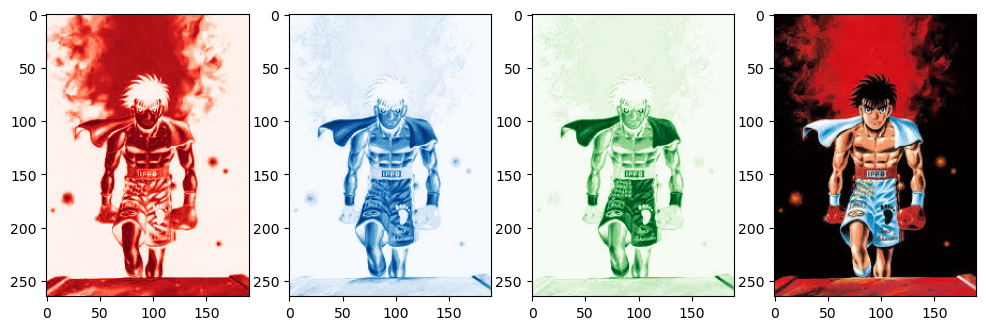

In [8]:
#question 1
color_img=cv2.imread('IPPO.JPEG')
color_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2RGB)
red_col=color_img[:,:,0]
blue_col=color_img[:,:,1]
green_col=color_img[:,:,2]

comb_img=np.stack((red_col,blue_col,green_col),axis=2)
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.imshow(red_col,cmap='Reds')
plt.subplot(1,4,2)
plt.imshow(blue_col,cmap='Blues')
plt.subplot(1,4,3)
plt.imshow(green_col,cmap='Greens')
plt.subplot(1,4,4)
plt.imshow(comb_img)

plt.show()

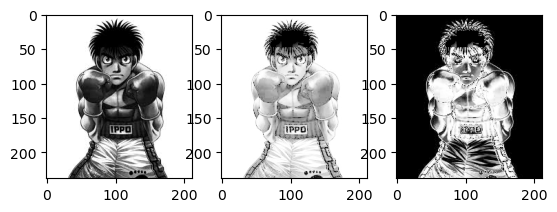

In [26]:
#question2
def log_trans(image):
    if image is None:
        print("error loading image!")
        return 0
    else:
        image=image.astype(np.float32)
        image=np.clip(image,0,255)
        c=255/np.log(1+np.max(image))
        trans_img=(c * np.log(1+image))
        trans_img=np.clip(trans_img,0,255).astype(np.uint8)
        img_fin=np.clip(img,0,255).astype(np.uint8)
        sub_image=cv2.subtract(trans_img,img_fin)
        plt.subplot(1,3,1)
        plt.imshow(image,cmap='gray')
        plt.subplot(1,3,2)
        plt.imshow(trans_img,cmap='gray')
        plt.subplot(1,3,3)
        plt.imshow(sub_image,cmap='gray')
        plt.show()
img=cv2.imread('IPPO2.JPEG',0)
if img is None:
    print("error")
else:
    log_trans(img)

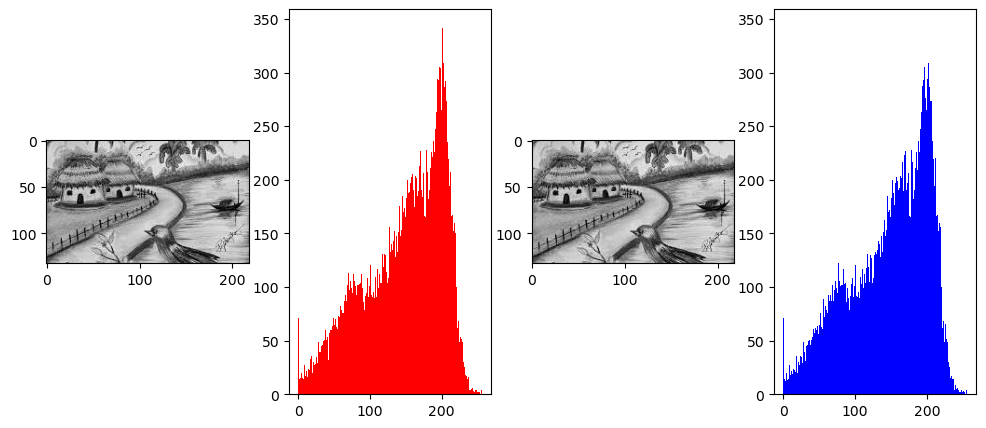

In [29]:
#question3-hist streaching
img=cv2.imread('scene.JPEG',0)
org_img=img.copy()
max_p=np.max(img)
min_p=np.min(img)

streatched_img=((img-min_p)/(max_p-min_p))*255
streactched_img=streatched_img.astype(np.uint)

plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.imshow(org_img,cmap='gray')
plt.subplot(1,4,2)
plt.hist(org_img.ravel(),bins=256,range=[0,256],color='red')

plt.subplot(1,4,3)
plt.imshow(streatched_img,cmap='gray')
plt.subplot(1,4,4)
plt.hist(streatched_img.ravel(),bins=256,range=[0,256],color='blue')

plt.show()



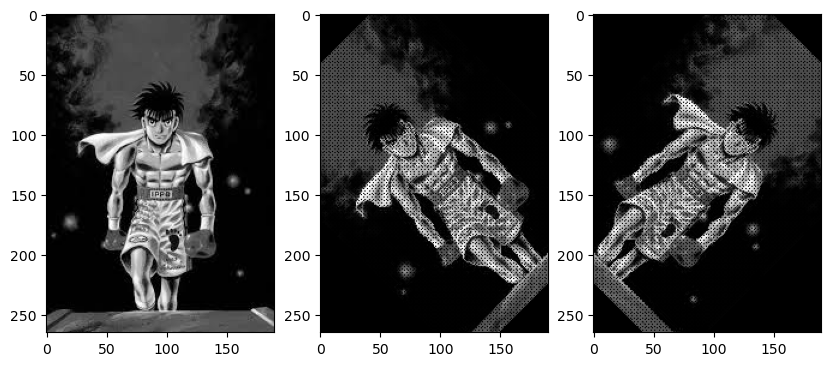

In [33]:
#ques6-rotate and antirotate by 45
def rotate_img(img,deg):
    theta=np.radians(deg)
    h,w=img.shape[:2]
    cen_x,cen_y=w//2,h//2
    rotated_img=np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            x_shift=x-cen_x
            y_shift=y-cen_y
            new_x=int(x_shift*np.cos(theta)-y_shift*np.sin(theta))+cen_x
            new_y=int(x_shift*np.sin(theta)+y_shift*np.cos(theta))+cen_y
            if 0<=new_x<w and 0<=new_y<h:
                rotated_img[new_y,new_x]=img[y,x]

    return rotated_img
img=cv2.imread('IPPO.JPEG',0)
if img is None:
    print("error")
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
rotate=rotate_img(img,-45)
plt.subplot(1,3,2)
plt.imshow(rotate,cmap='gray')
anti_rotate=rotate_img(img,45)
plt.subplot(1,3,3)
plt.imshow(anti_rotate,cmap='gray')

plt.show()

            

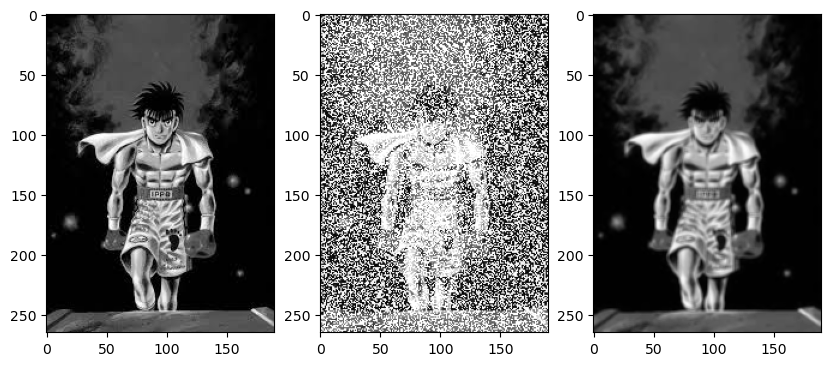

In [39]:
#ques4-gaussian noise and mean filter
def gaussian_noise(img,mean,sigma):
    gauss=np.random.normal(mean,sigma,img.shape).astype(np.uint8)
    noisy_img=cv2.add(img,gauss)
    return noisy_img
def mean_filter_img(img):
    k_size=(3,3)
    filtered_img=cv2.blur(img,k_size)
    return filtered_img
plt.figure(figsize=(10,8))
img=cv2.imread('IPPO.JPEG',0)
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
noisy_img=gaussian_noise(img,0,20)
plt.subplot(1,3,2)
plt.imshow(noisy_img,cmap='gray')
filtered_img=mean_filter_img(img)
plt.subplot(1,3,3)
plt.imshow(filtered_img,cmap='gray')

plt.show()


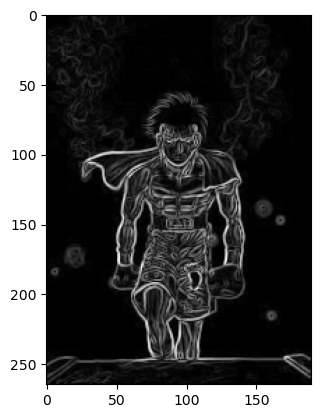

In [41]:
#ques5-sobel operator
img=cv2.imread('IPPO.JPEG',0)
sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
soble_combined=cv2.magnitude(sobel_x,sobel_y)

plt.imshow(soble_combined,cmap='gray')
plt.show()

In [ ]:
#2023-set2

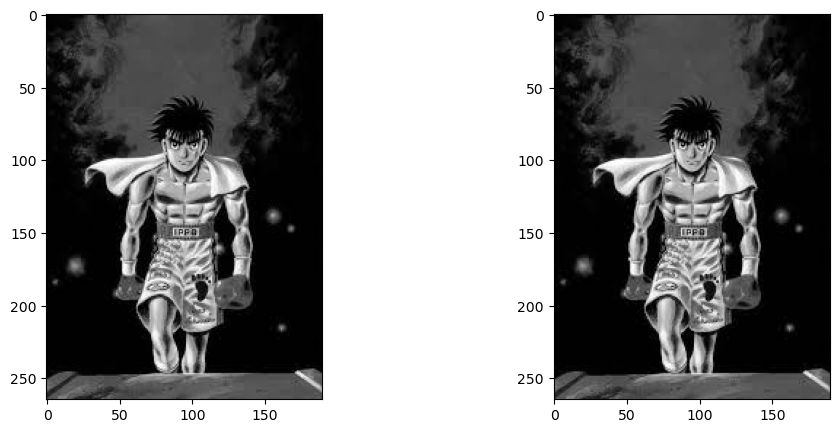

In [46]:
#ques1-contrast streaching
img=cv2.imread('IPPO.JPEG',0)
h,w=img.shape
bit_depth=img.dtype.itemsize*8
res_img=img.copy()
smax=2**bit_depth-1
smin=0
rmax=np.max(img)
rmin=np.min(img)

for i in range(h):
    for j in range(w):
        p=img[i,j]
        con_img=(((smax-smin)*(p-rmin))/(rmax-rmin))+smin
        res_img[i,j]=np.clip(con_img,0,255).astype(np.uint8)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res_img,cmap='gray')

plt.show()

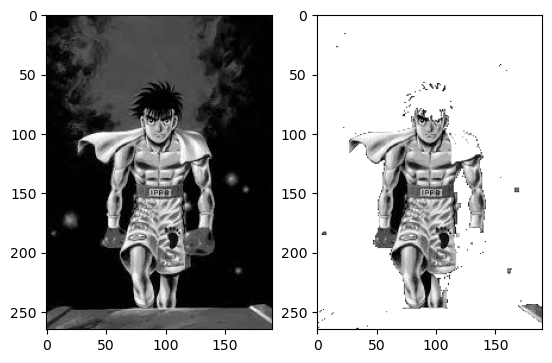

In [53]:
#question5-region growing
img=cv2.imread('IPPO.JPEG',0)
org_img=img.copy()
seed=(img.shape[0]//2,img.shape[1]//2)
mask=np.zeros((img.shape[0]+2,img.shape[1]+2),np.uint8)
cv2.floodFill(img,mask,seed,255,loDiff=20,upDiff=20)
plt.subplot(1,2,1)
plt.imshow(org_img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.show()


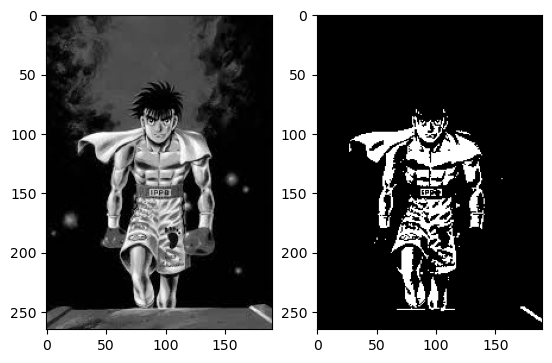

In [61]:
#ques6-thresholding
img=cv2.imread('IPPO.JPEG',0)
org_img=img.copy()
M=np.max(img)
N=np.min(img)
threshold_val=0.6*(M+N)
_,res_img=cv2.threshold(img,threshold_val,255,cv2.THRESH_BINARY)
#res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(org_img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res_img,cmap='gray')
plt.show()

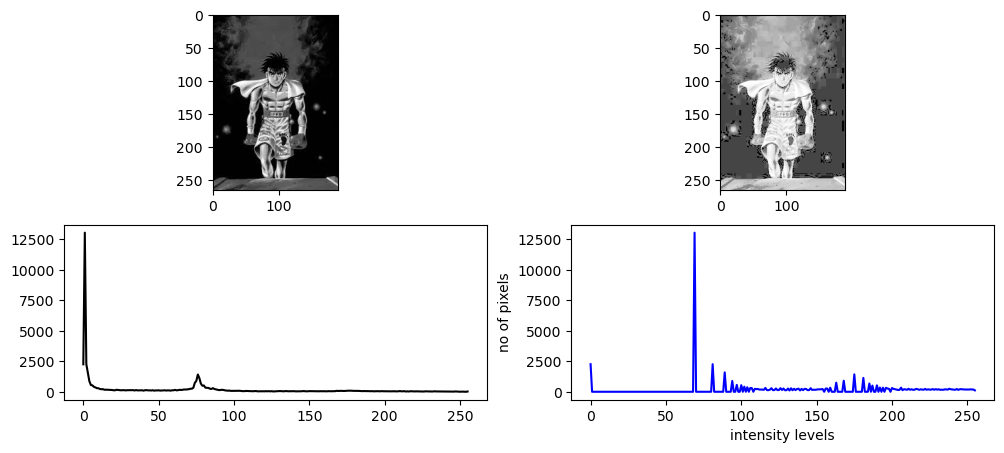

In [12]:
#ques2-histogram equalization
img=cv2.imread('IPPO.JPEG',0)
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
equalized_img=cv2.equalizeHist(img)
plt.subplot(2,2,2)
plt.imshow(equalized_img,cmap='gray')
equa_hist_org=cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(2,2,3)
plt.plot(equa_hist_org,color='black')
equa_hist=cv2.calcHist([equalized_img],[0],None,[256],[0,256])
plt.subplot(2,2,4)
plt.plot(equa_hist,color='blue')
plt.xlabel("intensity levels")
plt.ylabel("no of pixels")
plt.axis("on")
plt.show()


enter max it 180
enter min int 80


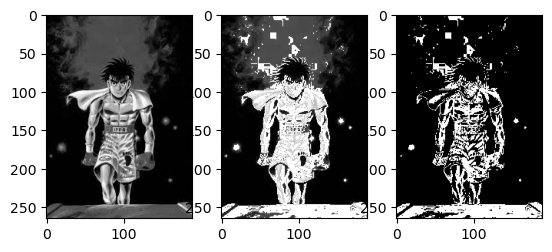

In [72]:
#ques-3-intensity level slicing with or without background
def grey_with_back(img,min_int,max_int):
    sliced=np.where((img>=min_int) & (img<=max_int),255,img).astype(np.uint8)
    return sliced
def gray_without_back(img,min_int,max_int):
    sliced=np.where((img<=max_int) & (img>=min_int),255,0).astype(np.uint8)
    return sliced
img=cv2.imread('IPPO.JPEG',0)
max_int=int(input("enter max it"))
min_int=int(input("enter min int"))
res1=grey_with_back(img,min_int,max_int)
res2=gray_without_back(img,min_int,max_int)

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.show()

enter salt prob 0.05
enter pepper prob 0.07


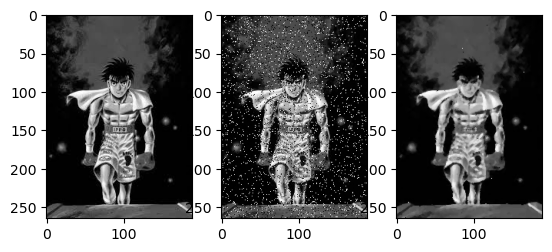

In [30]:
#ques4-salt and pepper and median filter
img=cv2.imread('IPPO.JPEG',0)
org_img=img.copy()
s_p=float(input("enter salt prob"))
p_p=float(input("enter pepper prob"))

total_pixel=img.size
salt_num=int(s_p*total_pixel)
salt_cords=[np.random.randint(0,i,salt_num) for i in img.shape]
org_img[salt_cords[0],salt_cords[1]]=255

pepp_num=int(p_p*total_pixel)
pepp_cords=[np.random.randint(0,i,pepp_num) for i in img.shape]
org_img[pepp_cords[0],pepp_cords[1]]=0

filtered_img=cv2.medianBlur(org_img,3)
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(org_img,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(filtered_img,cmap='gray')
plt.show()

In [ ]:
#set-3

enter a mean value 0
enter sigma value 25


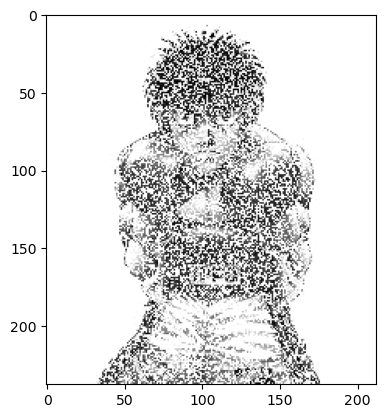

In [14]:
#ques-1-gaussian noise
img=cv2.imread('IPPO2.JPEG',0)
mean=float(input("enter a mean value"))
sigma=float(input("enter sigma value"))
def gauss_noise(img,mean,sigma):
    gauss=np.random.normal(mean,sigma,img.shape).astype(np.uint8)
    noisy=cv2.add(img,gauss)
    return noisy
noisy_img=gauss_noise(img,mean,sigma)

plt.imshow(noisy_img,cmap='gray')
plt.show()

enter min int 80
enter max int 180


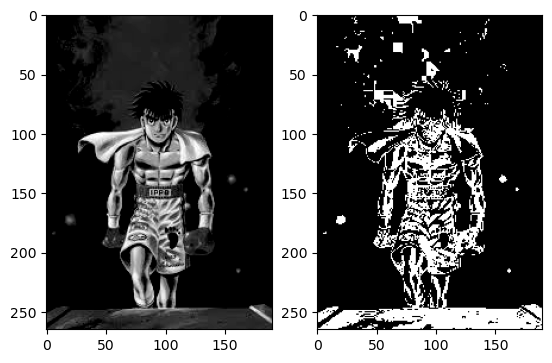

In [19]:
#ques-4-brightness supression and graylevel slicing without background
img=cv2.imread('IPPO.JPEG',0)
def brightness_supp(img):
  res_img=cv2.subtract(img,np.array([50.0]))
  return res_img
def gray_without_background(img):
    min_int=int(input("enter min int"))
    max_int=int(input("enter max int"))
    res_img=np.where((img>=min_int) & (img<=max_int),255,0).astype(np.uint8)
    return res_img
res1=brightness_supp(img)
res2=gray_without_background(img)
plt.subplot(1,2,1)
plt.imshow(res1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res2,cmap='gray')
plt.show()

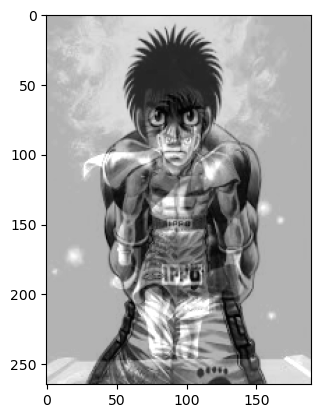

In [23]:
#ques6-average of images
img1=cv2.imread('IPPO.JPEG',0)
img2=cv2.imread('IPPO2.JPEG',0)
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))

res_img=cv2.addWeighted(img1,0.5,img2,0.7,0).astype(np.uint8)
plt.imshow(res_img,cmap='gray')
plt.show()

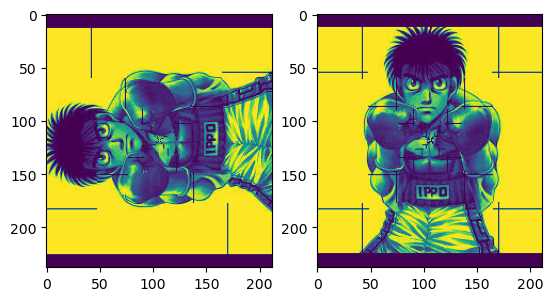

In [27]:
def rotate_img(img,deg):
    theta=np.radians(deg)
    h,w=img.shape[:2]
    cen_x,cen_y=w//2,h//2
    res_img=np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            x_shift=x-cen_x
            y_shift=y-cen_y
            new_x=int(x_shift*np.cos(theta)-y_shift*np.sin(theta))+cen_x
            new_y=int(x_shift*np.sin(theta)+y_shift*np.cos(theta))+cen_y
            if 0<=new_x<w and 0<=new_y<h:
                   res_img[new_y,new_x]=img[y,x]
    return res_img
img=cv2.imread('IPPO2.JPEG',0)
if img is None:
    print("error")
res1=rotate_img(img,-90)
plt.subplot(1,2,1)
plt.imshow(res1)
res2=rotate_img(res1,90)
plt.subplot(1,2,2)
plt.imshow(res2)
plt.show()



In [ ]:
#set4

In [29]:
img=cv2.imread('IPPO.JPEG',0)
h,w=img.shape
print("he height is",h)
print("the width is",w)
M=int(input("enter the new height"))     
N=int(input("enter the width"))
new_img=cv2.resize(img,(M,N))
min_int=np.min(new_img)
max_int=np.max(new_img)
avg_int=np.mean(new_img)
print(min_int)
print(max_int)
print(avg_int)

he height is 265
the width is 190


enter the new height 200
enter the width 150


0
255
53.101
